Данные  

Игра содержит особое событие – ивент, для прохождения которого пользователи могут тратить деньги. Группа дизайнеров решила поменять **вид окошка покупки ивентовых продуктов.** Чтобы оценить результат нововведения, провели АБ тест, разделив пользователей на две группы: контрольную и тестовую (с окошком нового типа). 

Задача  
Исследовать какая из АБ групп лучше себя показала.
Результаты предоставить в понятной для широкой аудитории форме, сопроводив по необходимости графиками/дашбордами/числами.
Колонки
1. AbGroup – имя АБ группы: Control/Test
2. user_id – id пользователя
3. time_stamp – день события
4. install_date – день установки приложения пользователем
5. event_name – техническое название события (InAppPurchase - в случае покупки за деньги, ResourceSpend в случае покупки за игровую валюту)
6. platform – платформа google / itunes
7. network_name – пользователь установил игру по переходу с рекламы (Paid) или нет (Organic)
8. country_name – страна пользователя
9. InGameTime – сколько всего пользователь провел в игре секунд
10. LastCompletedLevel – номер последнего пройденного уровня
11. avg_energy_amount – сколько в среднем энергии было у пользователя за день
12. revenue_on_event – ревеню, потраченное на покупку ивентовых продуктов
13. revenue_on_other_activities – ревеню, потраченное на остальные продукты, включая золото
14. **gold_on_event – золото, потраченное на ивентный прогресс**
15. **gold_on_other_activities – золото, потраченное на другие продукты**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
df = pd.read_csv('test_task_product_analyst_2021_20210427.csv')
df.sample(3)

,AbGroup,user_id,time_stamp,install_date,event_name,platform,network_name,country_name,InGameTime,LastCompletedLevel,avg_energy_amount,revenue_on_event,revenue_on_other_activities,gold_on_event,gold_on_other_activities
184434,Control,223565d88f13cdbd2888b5260a455a1994109288,2020-03-04,2020-02-29,ResourceSpend,itunes,Organic,United Kingdom of Great Britain and Northern I...,9046,16,70.0,0.0,0.0,NaN,NaN
105707,Control,b19cb9ea123206f12147ef15df682eab91b602c7,2020-02-26,2018-11-20,ResourceSpend,itunes,Organic,France,444934,1134,29.0,0.0,0.0,NaN,NaN
263271,Test,e1b5e4612228d2bfd06a368e560f73ba2f89885e,2020-02-16,2020-02-16,ResourceSpend,itunes,Organic,United Kingdom of Great Britain and Northern I...,9405,13,73.0,0.0,0.0,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696840 entries, 0 to 696839
Data columns (total 15 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   AbGroup                      696840 non-null  object 
 1   user_id                      696840 non-null  object 
 2   time_stamp                   696840 non-null  object 
 3   install_date                 696840 non-null  object 
 4   event_name                   696840 non-null  object 
 5   platform                     696840 non-null  object 
 6   network_name                 696840 non-null  object 
 7   country_name                 696840 non-null  object 
 8   InGameTime                   696840 non-null  int64  
 9   LastCompletedLevel           696840 non-null  int64  
 10  avg_energy_amount            696840 non-null  float64
 11  revenue_on_event             696840 non-null  float64
 12  revenue_on_other_activities  696840 non-null  float64
 13 

In [5]:
df['AbGroup'].value_counts()

Control    558070
Test       138770
Name: AbGroup, dtype: int64

In [6]:
df['AbGroup'].value_counts(normalize=True)

Control    0.800858
Test       0.199142
Name: AbGroup, dtype: float64

Новую идею боятся сразу проверять на большой выборке пользователей.

In [10]:
df.groupby('AbGroup').agg({'user_id': ['count', 'nunique']})

user_id        
          count nunique
AbGroup                
Control  558070   89034
Test     138770   22278

In [11]:
df.groupby('AbGroup')['user_id'].agg(['count', 'nunique'])

,count,nunique
AbGroup,,
Control,558070,89034
Test,138770,22278


In [12]:
df.head()

,AbGroup,user_id,time_stamp,install_date,event_name,platform,network_name,country_name,InGameTime,LastCompletedLevel,avg_energy_amount,revenue_on_event,revenue_on_other_activities,gold_on_event,gold_on_other_activities
0,Control,d60ebcaecff2dc1d360a8a41271e6fd8a902c107,2020-02-10,2019-11-10,ResourceSpend,itunes,Organic,United Kingdom of Great Britain and Northern I...,276180,345,54.0,0.0,0.0,NaN,NaN
1,Test,f6e385b0ab43d5aea9cfcc408aa84029a4ea5fdb,2020-03-04,2019-11-05,ResourceSpend,itunes,Paid,United States of America,166095,199,50.0,0.0,0.0,NaN,NaN
2,Control,a4c80c8524e2c11cc238553d7b02da01ce2aad66,2020-02-26,2020-01-02,ResourceSpend,itunes,Paid,Canada,240986,84,39.0,0.0,0.0,NaN,NaN
3,Control,7ea2e4599ae33760c307e254839317bd5b17a63c,2020-02-21,2020-01-13,ResourceSpend,itunes,Organic,France,989822,1176,21.0,0.0,0.0,NaN,NaN
4,Control,6495168982929360dc6d84bf0766d8963a7ddc41,2020-02-18,2020-02-05,ResourceSpend,itunes,Paid,Spain,52106,66,43.0,0.0,0.0,500.0,NaN


In [13]:
df['time_stamp'] = pd.to_datetime(df['time_stamp'], format = '%Y-%m-%d')

<AxesSubplot:xlabel='time_stamp'>

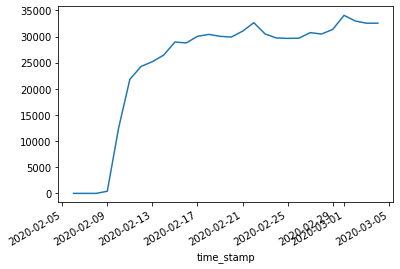

In [15]:
df.groupby('time_stamp')['user_id'].count().plot()

<AxesSubplot:xlabel='time_stamp'>

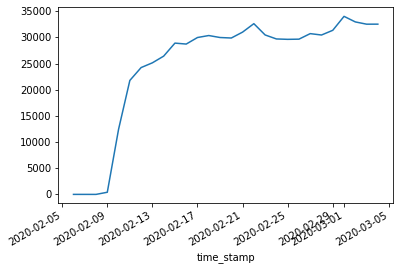

In [16]:
df.groupby('time_stamp')['user_id'].nunique().plot()

* Данж для этого события только раз в сутки на игрока
* Данные о platform, network_name, country_name даны, **чтобы проверить сбалансированность train и test**
* **revenue_on_other_activities** - это побочный эффект. Мы можем оценивать нововведение не только по его прямому назначению, но мы должны также смотреть на побочные эффекты (плохие или хорошие), которые оно создаёт

In [17]:
df['revenue_on_event'].value_counts()

0.0    696840
Name: revenue_on_event, dtype: int64

In [18]:
df['revenue_on_event'].describe()

count    696840.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: revenue_on_event, dtype: float64

In [20]:
df['revenue_on_other_activities'].value_counts()

0.0    696840
Name: revenue_on_other_activities, dtype: int64

In [21]:
df['gold_on_event'].describe()

count     45412.000000
mean       1992.865322
std        3895.541280
min         500.000000
25%         500.000000
50%        1000.000000
75%        2400.000000
max      189600.000000
Name: gold_on_event, dtype: float64

In [22]:
df['gold_on_other_activities'].describe()

count    168193.000000
mean        936.481899
std        3522.989145
min         100.000000
25%         500.000000
50%         600.000000
75%        1000.000000
max      755950.000000
Name: gold_on_other_activities, dtype: float64

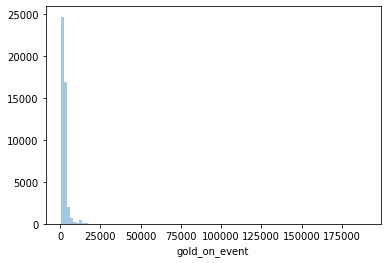

In [40]:
sns.distplot(df['gold_on_event'], kde=False, bins=100)
plt.show()

Распределение с жирным хвостом. </br>
Статистика в классическом виде на жирном хвосте практически бесполезна. Сравнивать средние при таком распределении - плохая идея в принципе.

In [45]:
df['gold_on_event_flag'] = (df['gold_on_event'] > 0) * 1
df['gold_on_other_activities_flag'] = (df['gold_on_other_activities'] > 0) * 1

Когда мы работаем с бинарной переменной, мы можем посмотреть на конверсию, не боясь распределения с жирным хвостом.

In [11]:
df.groupby(['AbGroup'])['gold_on_event_flag'].agg(['count', 'mean'])

,count,mean
AbGroup,,
Control,558070,0.06523
Test,138770,0.06492


In [22]:
(df.groupby(['AbGroup'])
[['gold_on_event_flag', 'gold_on_event']].
agg({'gold_on_event_flag': ['count', 'mean'],
     'gold_on_event': ['mean', 'median']}))

gold_on_event_flag          gold_on_event        
                     count     mean          mean  median
AbGroup                                                  
Control             558070  0.06523   1965.211658  1000.0
Test                138770  0.06492   2104.606505  1500.0

Мы можем сделать анализ на Пользователя.

In [26]:
#ДЛЯ КАЖДОГО ПОЛЬЗОВАТЕЛЯ ПОСЧИТАЛИ УНИКАЛЬНОЕ КОЛИЧЕСТВО ЗНАЧЕНИЯ В ПОЛЕ AbGroup
t = df.groupby(['user_id'])['AbGroup'].nunique().reset_index()
t[t['AbGroup'] > 1]

,user_id,AbGroup
202,007a61c7cc84aa559280c6d222aa3e15cb5e0114,2
208,007c891d5eb34c1398966a836d74a123452384de,2
895,02125379d8faf43debf755edfb32758ea5d789d8,2
1097,028e3fc09324ac6df71fccf432dabe44e476956c,2
1107,02977b73d35305fc135ea01bfcc9e1aa334d480a,2
...,...,...
110097,fe08c305b0317eecc6b5cf3cc5362fc912afdc0b,2
110362,fea60891a7ef95c7b95a0b1e58cb9d755684b3de,2
110480,fef449646b98d04def88b9ddb45e7c43bd9a278a,2
110515,ff079e7288b379b4e47650da302a5cc23e8c7ad3,2


In [29]:
(df.groupby(['user_id', 'AbGroup'])
[['gold_on_event_flag', 'gold_on_event']]
.agg({'gold_on_event_flag': ['count', 'mean'],
      'gold_on_event': ['mean', 'median']}))

gold_on_event_flag            \
                                                              count      mean   
user_id                                  AbGroup                                
00000d6d79ec151d74c5b0c0705d9d9fe252fe83 Control                  2  0.000000   
000133682d2dcd90c1a9c8ca5e34a294f31af64f Control                 19  0.105263   
0001f13b0535b174bc7e36a1846c31c7a091c4b0 Control                 11  0.000000   
00021d57aced59fbfaf63ba620afada82fc06ca8 Test                    13  0.000000   
00027b7d34e10c17bfd4f76aa626403a2c5d1044 Test                     7  0.000000   
...                                                             ...       ...   
fffea25b3877c861a4ebaa00e8fb9c5b96672e00 Control                  1  0.000000   
fffeb6c54253ef0e7b0c4f38eb81a9dd9aebcb14 Control                  5  0.000000   
ffff1964e1cb3bb0fc17c9ed440e3a6b6e6adf99 Control                  6  0.000000   
ffff86c1dc72ba25d61ad8c92e9a5b3d6e2f5547 Control                  5  0.000000   
ffffb50d0170ef0bc2eda7d20211b2c963c61e2a Control                 24  0.000000   

                                                 gold_on_event          
                                                          mean  median  
user_id                                  AbGroup                        
00000d6d79ec151d74c5b0c0705d9d9fe252fe83 Control           NaN     NaN  
000133682d2dcd90c1a9c8ca5e34a294f31af64f Control        1250.0  1250.0  
0001f13b0535b174bc7e36a1846c31c7a091c4b0 Control           NaN     NaN  
00021d57aced59fbfaf63ba620afada82fc06ca8 Test              NaN     NaN  
00027b7d34e10c17bfd4f76aa626403a2c5d1044 Test              NaN     NaN  
...                                                        ...     ...  
fffea25b3877c861a4ebaa00e8fb9c5b96672e00 Control           NaN     NaN  
fffeb6c54253ef0e7b0c4f38eb81a9dd9aebcb14 Control           NaN     NaN  
ffff1964e1cb3bb0fc17c9ed440e3a6b6e6adf99 Control           NaN     NaN  
ffff86c1dc72ba25d61ad8c92e9a5b3d6e2f5547 Control           NaN     NaN  
ffffb50d0170ef0bc2eda7d20211b2c963c61e2a Control           NaN     NaN  

[111312 rows x 4 columns]

In [46]:
t = (df.groupby(['user_id', 'AbGroup'])
[['gold_on_event_flag', 'gold_on_event']]
.agg({'gold_on_event_flag': ['count', 'mean'],
      'gold_on_event': ['mean', 'median']})
.reset_index())

t.columns.to_flat_index()

Index([                ('user_id', ''),                 ('AbGroup', ''),
       ('gold_on_event_flag', 'count'),  ('gold_on_event_flag', 'mean'),
             ('gold_on_event', 'mean'),     ('gold_on_event', 'median')],
      dtype='object')

In [38]:
['_'.join(elem) for elem in t.columns.to_flat_index()]

['user_id_',
 'AbGroup_',
 'gold_on_event_flag_count',
 'gold_on_event_flag_mean',
 'gold_on_event_mean',
 'gold_on_event_median']

In [47]:
#ПОБЕДА НАД МУЛЬТИИНДЕКСОМ
t.columns = ['_'.join(elem) for elem in t.columns.to_flat_index()]
t.head()

,user_id_,AbGroup_,gold_on_event_flag_count,gold_on_event_flag_mean,gold_on_event_mean,gold_on_event_median
0,00000d6d79ec151d74c5b0c0705d9d9fe252fe83,Control,2,0.000000,NaN,NaN
1,000133682d2dcd90c1a9c8ca5e34a294f31af64f,Control,19,0.105263,1250.0,1250.0
2,0001f13b0535b174bc7e36a1846c31c7a091c4b0,Control,11,0.000000,NaN,NaN
3,00021d57aced59fbfaf63ba620afada82fc06ca8,Test,13,0.000000,NaN,NaN
4,00027b7d34e10c17bfd4f76aa626403a2c5d1044,Test,7,0.000000,NaN,NaN


In [53]:
t['user_id'] = 1 #ИДЕНТИФИКАТОР ПОЛЬЗОВАТЕЛЯ

In [54]:
#MEAN ПО ВСЕМ ПОЛЯМ = СРЕДНИЕ ПОКАЗАТЕЛИ НА ПОЛЬЗОВАТЕЛЯ
t.groupby('AbGroup_').agg(['count', 'mean'])

gold_on_event_flag_count           gold_on_event_flag_mean            \
                            count      mean                   count      mean   
AbGroup_                                                                        
Control                     89034  6.268055                   89034  0.031600   
Test                        22278  6.229015                   22278  0.030891   

         gold_on_event_mean              gold_on_event_median               \
                      count         mean                count         mean   
AbGroup_                                                                     
Control               10685  2119.778819                10685  2002.976135   
Test                   2603  2417.938571                 2603  2296.811371   

         user_id       
           count mean  
AbGroup_               
Control    89034  1.0  
Test       22278  1.0

Медиана для распределения с жирным хвостом = более адекватная метрика. </br>
Мы не можем проводить стандартный статистические тесты с медианой. Но мы можем сделать бутстрап.

In [55]:
df['AbGroup'].value_counts()

Control    558070
Test       138770
Name: AbGroup, dtype: int64

In [56]:
group_size = df['AbGroup'].value_counts().values

In [57]:
(df.groupby(['AbGroup'])
[['gold_on_event_flag', 'gold_on_event']].
agg({'gold_on_event_flag': ['count', 'mean'],
     'gold_on_event': ['mean', 'median']}))

gold_on_event_flag          gold_on_event        
                     count     mean          mean  median
AbGroup                                                  
Control             558070  0.06523   1965.211658  1000.0
Test                138770  0.06492   2104.606505  1500.0

In [58]:
from tqdm.notebook import tqdm #progress bar

In [60]:
n = 1000 #экспериментов (обычно 10000 делается, в зависимости от вычислительной мощности)
result = [] #для сложения результатов эксперимента
base_diff = 500 #разница между медианами
for _ in tqdm(range(n)): #i не нужен
    a = df.sample(group_size[0], replace=True)['gold_on_event'].median()
    b = df.sample(group_size[1], replace=True)['gold_on_event'].median()
    result.append(np.abs(a-b) >= base_diff)

  0%|          | 0/1000 [00:00<?, ?it/s]

* Проведя эксперимент в реальном мире мы получили разницу в base_diff = 500
* Необходимо проверить, какова вероятность получить такой результат (base_diff) при отсутствии каких-либо различий между этими двум группами
* Сымитировать отсутствие различие можно "забыв" о наличии признака AbGroup
* Берём перемешанные выборки такого же размера, как на эксперименте
* Проверям, что модуль разницы между медианами больше или равен базовой разнице
* Нулевая гипотеза = различий нет

In [61]:
np.mean(result) #вероятность получить такой результат случайным образом

0.13

In [62]:
#1000/1000 [10:09<00:00, 1.59it/s]
n = 10000 #экспериментов (обычно 10000 делается, в зависимости от вычислительной мощности)
result = [] #для сложения результатов эксперимента
base_diff = 500 #разница между медианами
for _ in tqdm(range(n)): #i не нужен
    a = df.sample(group_size[0], replace=True)['gold_on_event'].median()
    b = df.sample(group_size[1], replace=True)['gold_on_event'].median()
    result.append(np.abs(a-b) >= base_diff)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [63]:
np.mean(result)

0.1173

In [65]:
#РАССЧИТАЕМ МЕТРИКИ ДЛЯ ВСЕХ ПОЛЬЗОВАТЕЛЕЙ, А НЕ ДЛЯ PAYING USERS
df['gold_on_event_nona'] = df['gold_on_event'].fillna(0)

(df.groupby(['AbGroup'])
[['gold_on_event_nona']]
.agg(['mean', 'median']))

gold_on_event_nona       
                      mean median
AbGroup                          
Control         128.191087    0.0
Test            136.631837    0.0

In [66]:
n = 1000 
result = [] #для сложения результатов эксперимента
base_diff = 136.631837 - 128.191087 #разница между медианами
for _ in tqdm(range(n)): #i не нужен
    a = df.sample(group_size[0], replace=True)['gold_on_event_nona'].mean()
    b = df.sample(group_size[1], replace=True)['gold_on_event_nona'].mean()
    result.append(np.abs(a-b) >= base_diff)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [67]:
np.mean(result)

0.017

Выросло количество платящих.